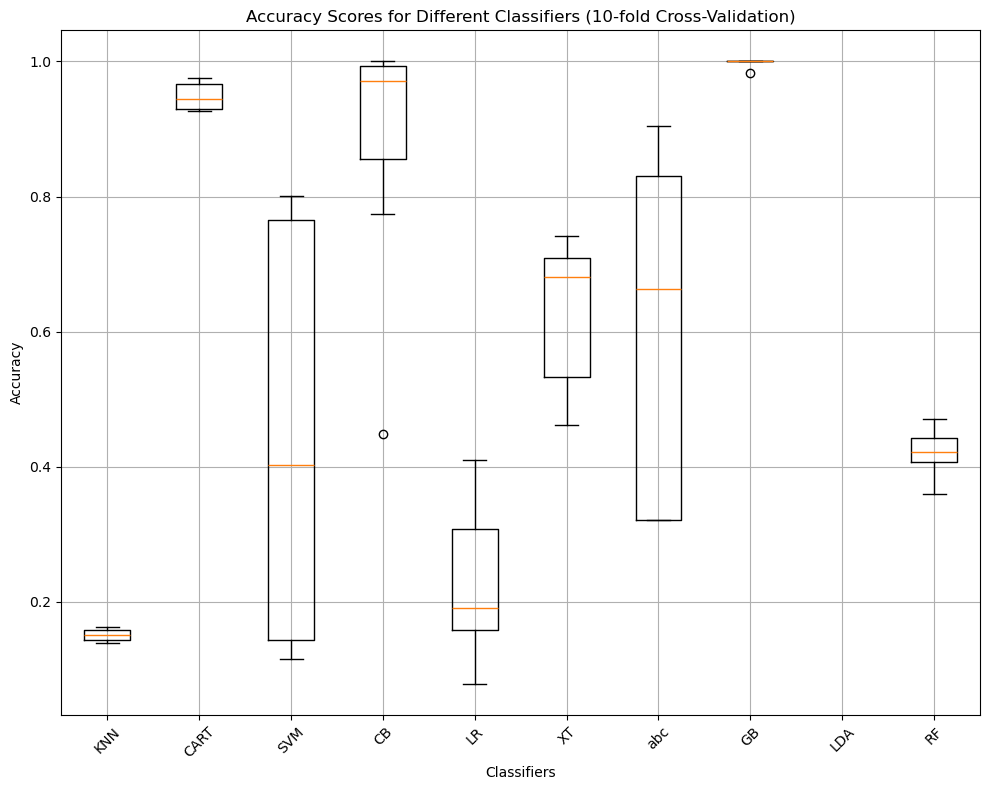

In [9]:
# loaded model for RF Dataverse
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings('ignore')

# Read in data as pandas dataframe and display first 5 rows
dataset = pd.read_csv('/Users/samsonmihirette/Documents/SWELL-TEST/Final2/dataverse_all_events_OnTheFly.csv')

#rf=rf.replace(to_replace=" NULL",value=0)
dataset['MeanEntropy'] = dataset['MeanEntropy'].fillna(0)
dataset['MaxEntropy'] = dataset['MaxEntropy'].fillna(0)

y = dataset['Anxiety'].copy()
X = dataset.drop('Anxiety', axis=1).copy()
X = dataset.drop('Comfort', axis=1).copy()

def preprocess_inputs(df):
    df = df.copy()
    
    #df['condition'] = df['condition'].replace(label_mapping)
    
    y = df['Anxiety'].copy()
    X = df.drop('Anxiety', axis=1).copy()
    X = df.drop('Comfort', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(dataset)

# Define the directory containing the dumped files
directory = '/Users/samsonmihirette/Documents/SWELL-TEST/Final2/results'  # Update this to your directory

# Function to load all dumped files for all classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Load all the dumped files for all classifiers
results = load_all_objs(directory)

# Extract the test scores for each classifier
test_scores = {clf_name: result['cv_results']['mean_test_score'] for clf_name, result in results.items()}

# Create a boxplot for accuracy scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.boxplot(test_scores.values())
plt.xticks(range(1, len(test_scores) + 1), test_scores.keys(), rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


Classifier: KNN
Fold 1: 0.1773
Fold 2: 0.1965
Fold 3: 0.1563
Fold 4: 0.1670
Fold 5: 0.1707
Fold 6: 0.1965
Fold 7: 0.1556
Fold 8: 0.1707
Fold 9: 0.1670
Fold 10: 0.1563
Mean Accuracy: 0.1503

Classifier: CART
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 1.0000
Fold 6: 1.0000
Fold 7: 1.0000
Fold 8: 1.0000
Fold 9: 1.0000
Fold 10: 1.0000
Mean Accuracy: 0.9474

Classifier: SVM
Fold 1: 1.0000
Fold 2: 0.1531
Fold 3: 0.6556
Fold 4: 1.0000
Fold 5: 0.1801
Fold 6: 0.6556
Fold 7: 0.1801
Fold 8: 0.1284
Fold 9: 1.0000
Fold 10: 0.1130
Mean Accuracy: 0.4406

Classifier: CB
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 1.0000
Fold 6: 1.0000
Fold 7: 0.6111
Fold 8: 1.0000
Fold 9: 1.0000
Fold 10: 1.0000
Mean Accuracy: 0.8925

Classifier: LR
Fold 1: 0.3311
Fold 2: 0.0721
Fold 3: 0.2349
Fold 4: 0.2235
Fold 5: 0.2110
Fold 6: 0.4574
Fold 7: 0.2235
Fold 8: 0.3737
Fold 9: 0.1801
Fold 10: 0.1660
Mean Accuracy: 0.2270

Classifier: XT
Fold 1: 0.8254
Fold 2: 0.9599
Fold 3

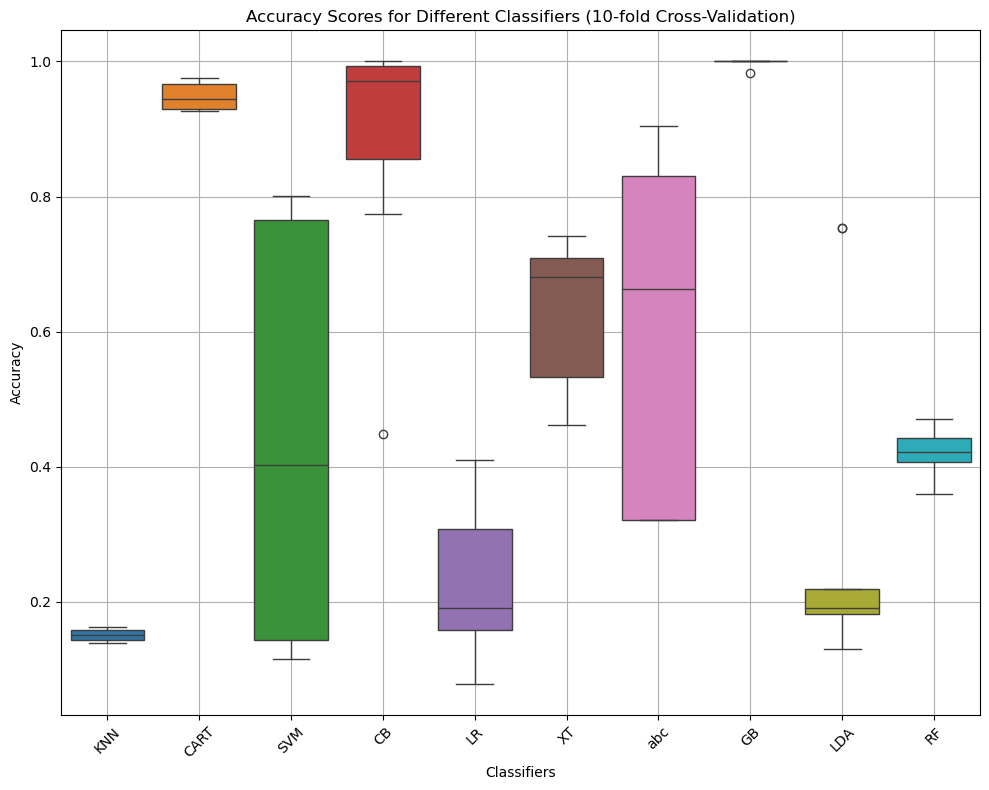

In [10]:
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    
    # Extract the test scores for each fold
    cv_results = result['cv_results']
    
    # Print the accuracy for each fold
    for fold_idx, score in enumerate(cv_results['split0_test_score']):
        print(f"Fold {fold_idx + 1}: {score:.4f}")
    
    # Calculate and print the mean accuracy across all folds
    mean_accuracy = cv_results['mean_test_score'].mean()
    print(f"Mean Accuracy: {mean_accuracy:.4f}\n")

# Create a DataFrame from the test scores dictionary
import pandas as pd
df = pd.DataFrame.from_dict(test_scores, orient='index').transpose()

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Accuracy Scores for Different Classifiers (10-fold Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.grid(True)  # Add gridlines
plt.tight_layout()
plt.show()


In [11]:
# Loop through each classifier
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    
    # Load the best estimator model for the current classifier
    best_estimator = result['best_estimator']
    
    # Make predictions using the loaded model on your test data
    predictions = best_estimator.predict(X_test)
    
    # Assuming it's a classifier, if you want class probabilities for each sample
    # class_probabilities = best_estimator.predict_proba(X_test)
    # print (class_probabilities)
    
    # Print or do something with the predictions
    print(predictions)  # Print predictions for this classifier
    print()  # For better separation in output

Classifier: KNN
[1 8 7 1 6 1 1 1 2 2 1 2 3 1 2 2 2 1 3 4 2 2 5 2 1 1 3 3 6 1 1 2 5 2 8 1 1
 3 2 3 4 2 1 2 2 3 1 2 2 3 3 3 1 1 2 1 8 5 1 2 3 1 1 8 7 1 1 1 3 4 1 6 1 2
 4 1 7 1 2 3 3 2 1 6 2]

Classifier: CART
[1 8 7 1 6 1 1 1 2 2 1 2 3 1 2 2 2 1 3 4 2 2 5 2 1 1 3 3 6 1 1 2 5 2 8 1 1
 3 2 3 4 2 1 2 2 3 1 2 2 3 3 3 1 1 2 1 8 5 1 2 3 1 1 8 7 1 1 1 3 4 1 6 1 2
 4 1 7 1 2 3 3 2 1 6 2]

Classifier: SVM
[1 8 7 1 6 1 1 1 2 2 1 2 3 1 2 2 2 1 3 4 2 2 5 2 1 1 3 3 6 1 1 2 5 2 8 1 1
 3 2 3 4 2 1 2 2 3 1 2 2 3 3 3 1 1 2 1 8 5 1 2 3 1 1 8 7 1 1 1 3 4 1 6 1 2
 4 1 7 1 2 3 3 2 1 6 2]

Classifier: CB
[[1]
 [8]
 [7]
 [1]
 [6]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [3]
 [1]
 [2]
 [2]
 [2]
 [1]
 [3]
 [4]
 [2]
 [2]
 [5]
 [2]
 [1]
 [1]
 [3]
 [3]
 [6]
 [1]
 [1]
 [2]
 [5]
 [2]
 [8]
 [1]
 [1]
 [3]
 [2]
 [3]
 [4]
 [2]
 [1]
 [2]
 [2]
 [3]
 [1]
 [2]
 [2]
 [3]
 [3]
 [3]
 [1]
 [1]
 [2]
 [1]
 [8]
 [5]
 [1]
 [2]
 [3]
 [1]
 [1]
 [8]
 [7]
 [1]
 [1]
 [1]
 [3]
 [4]
 [1]
 [6]
 [1]
 [2]
 [4]
 [1]
 [7]
 [1]
 [2]
 [3]
 [3]
 [2]
 